<a href="https://colab.research.google.com/github/kaylangu/knn/blob/main/GSS_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load selected variables into selected_gss_data.csv:

In [16]:
import pandas as pd
#
var_list = ['year', 'age', 'educ', 'relig', 'happy', 'degree', 'polviews'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode



Read .csv into memory.

In [17]:
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

Only include the years from 2012 to 2022 (2022 is the latest data, as the older data may reflect different trends and that is not the focus of this investigation)

In [18]:
# Remove any entries in table that specify the word 'year' as they represent uncleaned data and only
# specify which column represents which variable (it's data that should be completely ignored as it represents a row
# with all the variables included like at the top of the table)
df = df.loc[df['year'] != 'year']

# Cast year to number
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter out the years only between 2012 and 2022
df = df.loc[(df.year >= 2012) & (df.year <= 2022)]

# Now only includes data from 2012 to 2022
print(df, '\n')

       year   age  educ       relig         happy                    degree  \
55089  2012  22.0  16.0    catholic    very happy                bachelor's   
55090  2012  21.0  12.0    catholic    very happy               high school   
55091  2012  42.0  12.0  protestant  pretty happy               high school   
55092  2012  49.0  13.0  protestant    very happy               high school   
55093  2012  70.0  16.0  protestant    very happy                bachelor's   
...     ...   ...   ...         ...           ...                       ...   
72387  2022  22.0  12.0       other  pretty happy               high school   
72388  2022  29.0  19.0    catholic  pretty happy                  graduate   
72389  2022  32.0  15.0        none  pretty happy  associate/junior college   
72390  2022  49.0  17.0        none    very happy                  graduate   
72391  2022  50.0  20.0        none  pretty happy                  graduate   

                           polviews  
55089  modera

See count of NAs in dataframe df:

In [19]:
print("Rows, columns:", df.shape)
df.isna().sum()

Rows, columns: (17303, 7)


year          0
age         572
educ        101
relig       211
happy        72
degree       31
polviews    587
dtype: int64

Change column names:

In [20]:
df = df.rename(columns = {'educ':'education',
                    'relig':'religion',
                    'polviews':'political_view', 'degree':'degree_obtained'})

Clean age variable: (by casting ages to integers and leaving nans as-is in order to graph as it is a numerical type)

In [22]:
# Typecast age to float/numeric
df['age'] = pd.to_numeric(df['age'],errors='coerce')

# Converts age to integer and removes the .0 at the end
df['age'] = df['age'].apply(lambda x: int(x) if pd.notnull(x) else x)

print(df['age'].unique())

[22. 21. 42. 49. 70. 50. 35. 24. 28. 55. 36. 59. 52. 47. 18. 76. 39. 54.
 45. 71. 81. 44. 78. 63. 73. 40. 62. 27. 30. 29. 69. 51. 57. 68. 84. 38.
 46. 41. 75. 67. 48. 56. 43. 32. 23. 64. 34. 33. nan 19. 26. 60. 66. 53.
 58. 72. 74. 82. 61. 31. 65. 77. 25. 20. 89. 87. 83. 37. 85. 80. 86. 79.
 88.]


Clean education variable: (by casting to number and as it is a numeric type, keep NA's for graphing purposes)

In [24]:
# Typecast education to float/numeric
df['education'] = pd.to_numeric(df['education'], errors='coerce')

# Converts age to integer and removes the .0 at the end
df['education'] = df['education'].apply(lambda x: int(x) if pd.notnull(x) else x)

# Print uniques
print(df['education'].unique())

[16. 12. 13. 19. 15. 11.  9. 17. 10.  4.  0. 14. 18. 20.  8.  6.  5.  7.
 nan  3.  1.  2.]


Clean religion variable: (by capitalizing/editing any religion type and replacing any NAs with unknown).

In [21]:
# Capitalize religion type
to_replace = {'catholic': 'Catholic', 'protestant': 'Protestant', 'christian': 'Christian', 'none': 'None',
              'orthodox-christian': 'Orthodox-Christian', 'hinduism': 'Hinduism', 'other': 'Other', 'muslim/islam': 'Islam',
              'other eastern religions': 'Other Eastern Religions', 'buddhism': 'Buddhism', 'inter-nondenominational': 'Inter-Nondenominational',
              'native american': 'Native American', 'relig': 'Unknown'}
df['religion'] = df['religion'].map(to_replace)

# Replace any NAs with unknown and
df['religion'].fillna('Unknown', inplace=True) #replace NAs with 'unknown'

# Print uniques
print(df['religion'].unique())

['Catholic' 'Protestant' 'Christian' 'None' 'Orthodox-Christian'
 'Hinduism' 'Unknown' 'Other' 'Islam' 'Other Eastern Religions' 'Buddhism'
 'Inter-Nondenominational' 'Native American']


Clean happy variable: (Replace any NA's with 'Unknown')

In [25]:
# Capitalize and recategorize
to_replace = {'very happy': 'Very Happy', 'pretty happy': 'Moderately Happy', 'not too happy': 'Not Happy'}
df['happy'] = df['happy'].map(to_replace)

# Replace any NA's with Unknown
df['happy'].fillna('Unknown', inplace=True)

# Print uniques
print(df['happy'].unique())

['Very Happy' 'Moderately Happy' 'Not Happy' 'Unknown']


Clean degree variable: (by capitalizing each degree type and replacing NA's with unknowns)

In [23]:
# Capitalize each degree type
to_replace = {"bachelor's": "Bachelor's", "high school": "High School", "associate/junior college": "Associate/Junior College",
              "less than high school": 'Less Than High School', "graduate": "Graduate", "unknown": 'Unknown', "degree": "Unknown"}
df['degree_obtained'] = df['degree_obtained'].map(to_replace)

# Replace NA's with Unknowns
df['degree_obtained'].fillna('Unknown', inplace=True) #replace NAs with 'unknown'

# Print uniques
print(df['degree_obtained'].unique())

["Bachelor's" 'High School' 'Associate/Junior College'
 'Less Than High School' 'Graduate' 'Unknown']


Clean political_view variable: (capitalizing and renaming certain types to be less vague and replacing any NAs with Unknown). Then, creating new variable (political_view_id) that represents how liberal (1) to how conservative (7) a person is.



In [26]:
# Capitalize/edit naming of political view
to_replace = {'extremely liberal': "Extremely Liberal", 'liberal': 'Liberal', 'slightly liberal': 'Slightly Liberal', 'moderate, middle of the road': 'Moderate',
              "slightly conservative": 'Slightly Conservative', 'conservative': 'Conservative', 'extremely conservative': 'Extremely Conservative'}
df['political_view'] = df['political_view'].map(to_replace)

# Map political view to political view id
to_replace = {'Extremely Liberal': 1, 'Liberal': 2, 'Slightly Liberal': 3, 'Moderate': 4, 'Slightly Conservative': 5,
              'Conservative': 6, 'Extremely Conservative': 7}
df['political_view_id'] = df['political_view'].map(to_replace)

# Replace NAs with 'Unknown' only for political_view (categorical data type) and not political_view_id (numerical data type)
df['political_view'].fillna('Unknown', inplace=True)

# Print uniques
print(df['political_view'].unique())
print(df['political_view_id'].unique())

['Moderate' 'Slightly Conservative' 'Liberal' 'Conservative'
 'Extremely Liberal' 'Unknown' 'Extremely Conservative' 'Slightly Liberal']
[ 4.  5.  2.  6.  1. nan  7.  3.]


Plot visualizations:

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Must run this code snippet before graphing any plot (below)

<Axes: >

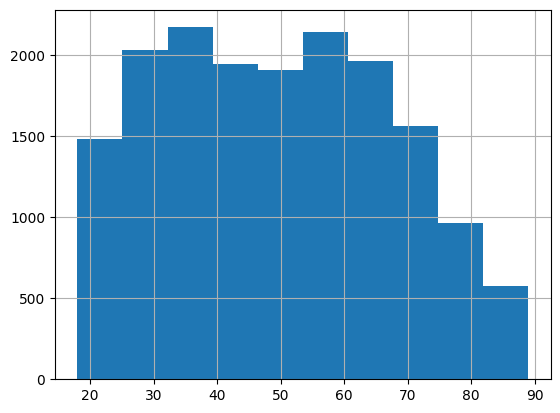

In [32]:
df['age'].hist(bins=10)

Looking at relationships with age and happiness before visualizing with political affiliation

In [31]:
pd.crosstab(df['age'], df['happy'])

happy,Moderately Happy,Not Happy,Unknown,Very Happy
age,,,,
18.0,47,16,0,10
19.0,84,28,1,34
20.0,100,27,1,24
21.0,102,37,0,46
22.0,133,47,0,40
...,...,...,...,...
85.0,31,11,0,16
86.0,30,12,0,28
87.0,22,11,0,9


<Axes: xlabel='age', ylabel='Count'>

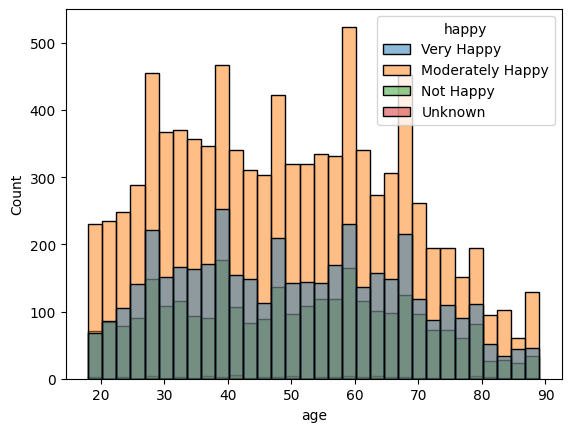

In [33]:
sns.histplot(data=df, x='age', hue='happy')

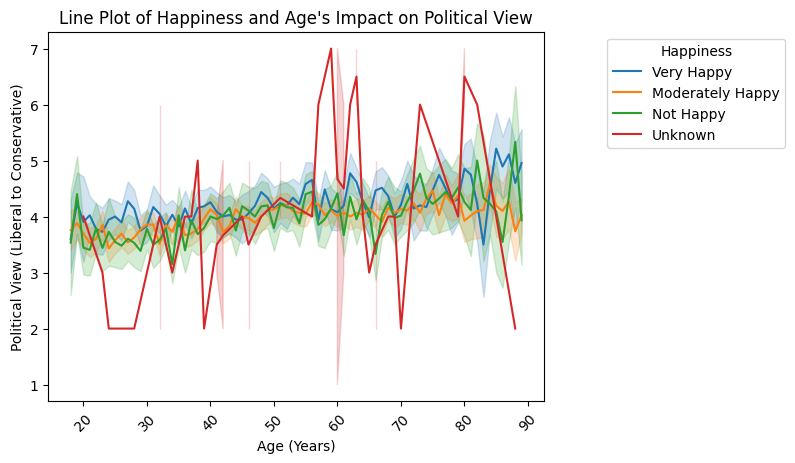

In [28]:
#
# Plot of age and happiness (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="happy")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Happiness and Age's Impact on Political View")
curr_plot.legend(title='Happiness')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

Looking at the relationship between (years of) education with political views

<Axes: xlabel='education', ylabel='political_view_id'>

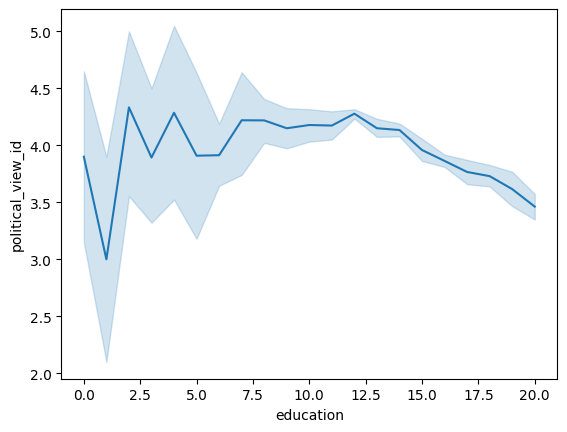

In [37]:
base=sns.lineplot(data=df, x='education', y='political_view_id')

Analyzing the relationship between degree and age

<Axes: xlabel='age', ylabel='Count'>

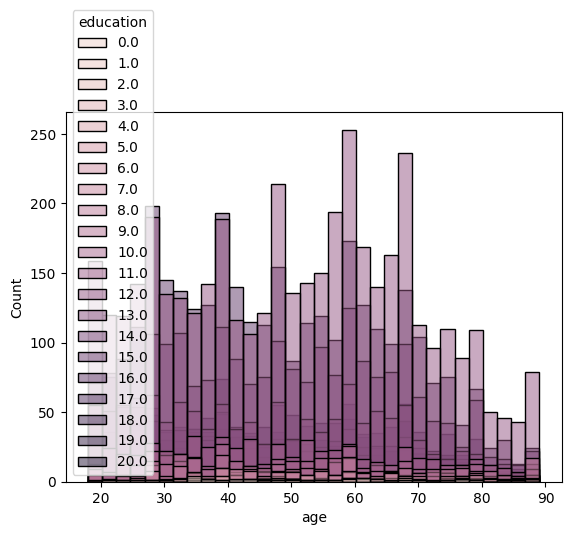

In [36]:
sns.histplot(data=df, x='age', hue='education')

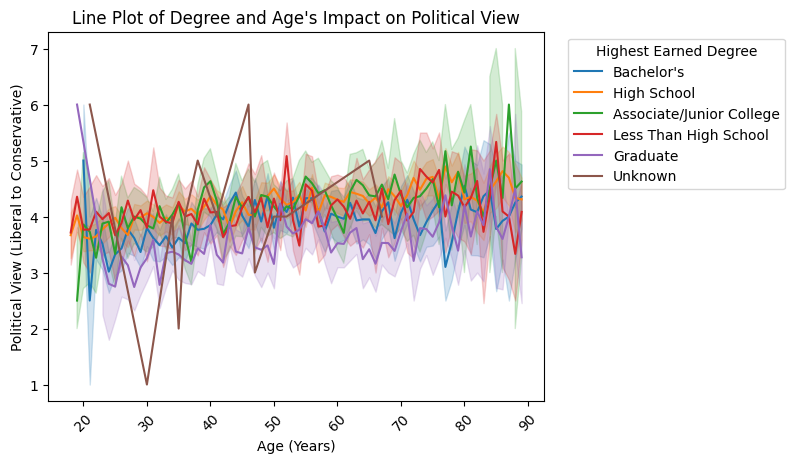

In [29]:
#
# Plot of degree and age (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="degree_obtained")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Degree and Age's Impact on Political View")
curr_plot.legend(title='Highest Earned Degree')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

In [52]:
# base=plt.bar(df['religion'], df['political_view_id'])
# base.legend(to_replace)

In [30]:
# curr_plot = sns.barplot(data=df, x="age", y="education", hue="political_view_id")

# curr_plot.tick_params(axis='x', rotation=90)
# curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Degree and Age's Impact on Political View")
# #urr_plot.legend(title='Highest Earned Degree')
# #sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))